In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import re
import csv

In [2]:
# Clean data

data = pd.read_csv('164_data.csv')

data = data.drop(labels = ['EndDate', 'Status', 'IPAddress', 'Progress', 
        'Finished', 'RecordedDate', 'ResponseId',
        'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
        'ExternalReference', 'LocationLatitude', 'LocationLongitude',
        'DistributionChannel', 'UserLanguage', 'Q9',
        'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q20',
        'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29',
        'Q32_1', 'Q32_2', 'Q32_3',
        'Q32_4', 'Q32_5', 'Q32_6', 'Q32_7', 'Q32_8', 'Q32_9', 'Q32_10',
        'Q32_11', 'Q32_12', 'Q32_13', 'Q32_14', 'Q32_15', 'Q32_16'], axis=1)

data.columns = ['StartDate', 'Duration', 'Q_Eat', 'Q_Sleep', 'Q_Comfort', 'Q_Exercise',
       'C_First Click', 'C_Last Click', 'C_Page Submit',
       'C_Click Count', 'E_First Click', 'E_Last Click',
       'E_Page Submit', 'E_Click Count',
       'Q_Age', 'Q_Gender', 'Q_Ethn', 'Q_Income', 'Q_FinSec', 'Score', 'PSS',
       'Worry', 'SIMS', 'IM', 'IR', 'ER', 'AM', 'KeyResponses', 'PlayerScore']
data = data.iloc[1:]

data = data.assign(Group= data['C_Page Submit'].isna().apply(lambda x: 'Experimental' if x == True else 'Control'))

In [3]:
def combine_CE(data):
    CE_cols = np.unique([col[1] for col in data.columns.str.split('_') if col[0] in ['C', 'E']])
    for label in CE_cols:
        C_col = f"C_{label}"
        E_col = f"E_{label}"
        if C_col in data.columns and E_col in data.columns:
            data = data.assign(**{label: data[C_col].fillna(data[E_col])})
            data = data.drop(labels= [C_col, E_col], axis=1)

    return data

data = combine_CE(data)

In [4]:
def float_convert(value):
    try:
        return float(value)
    except:
        return np.nan

num_cols = ['Duration', 'Score', 'PSS', 'Worry', 'SIMS', 'IM', 'IR', 'ER', 'AM', 'PlayerScore', 'Page Submit']
for col in num_cols:
    data[col] = data[col].apply(float_convert)

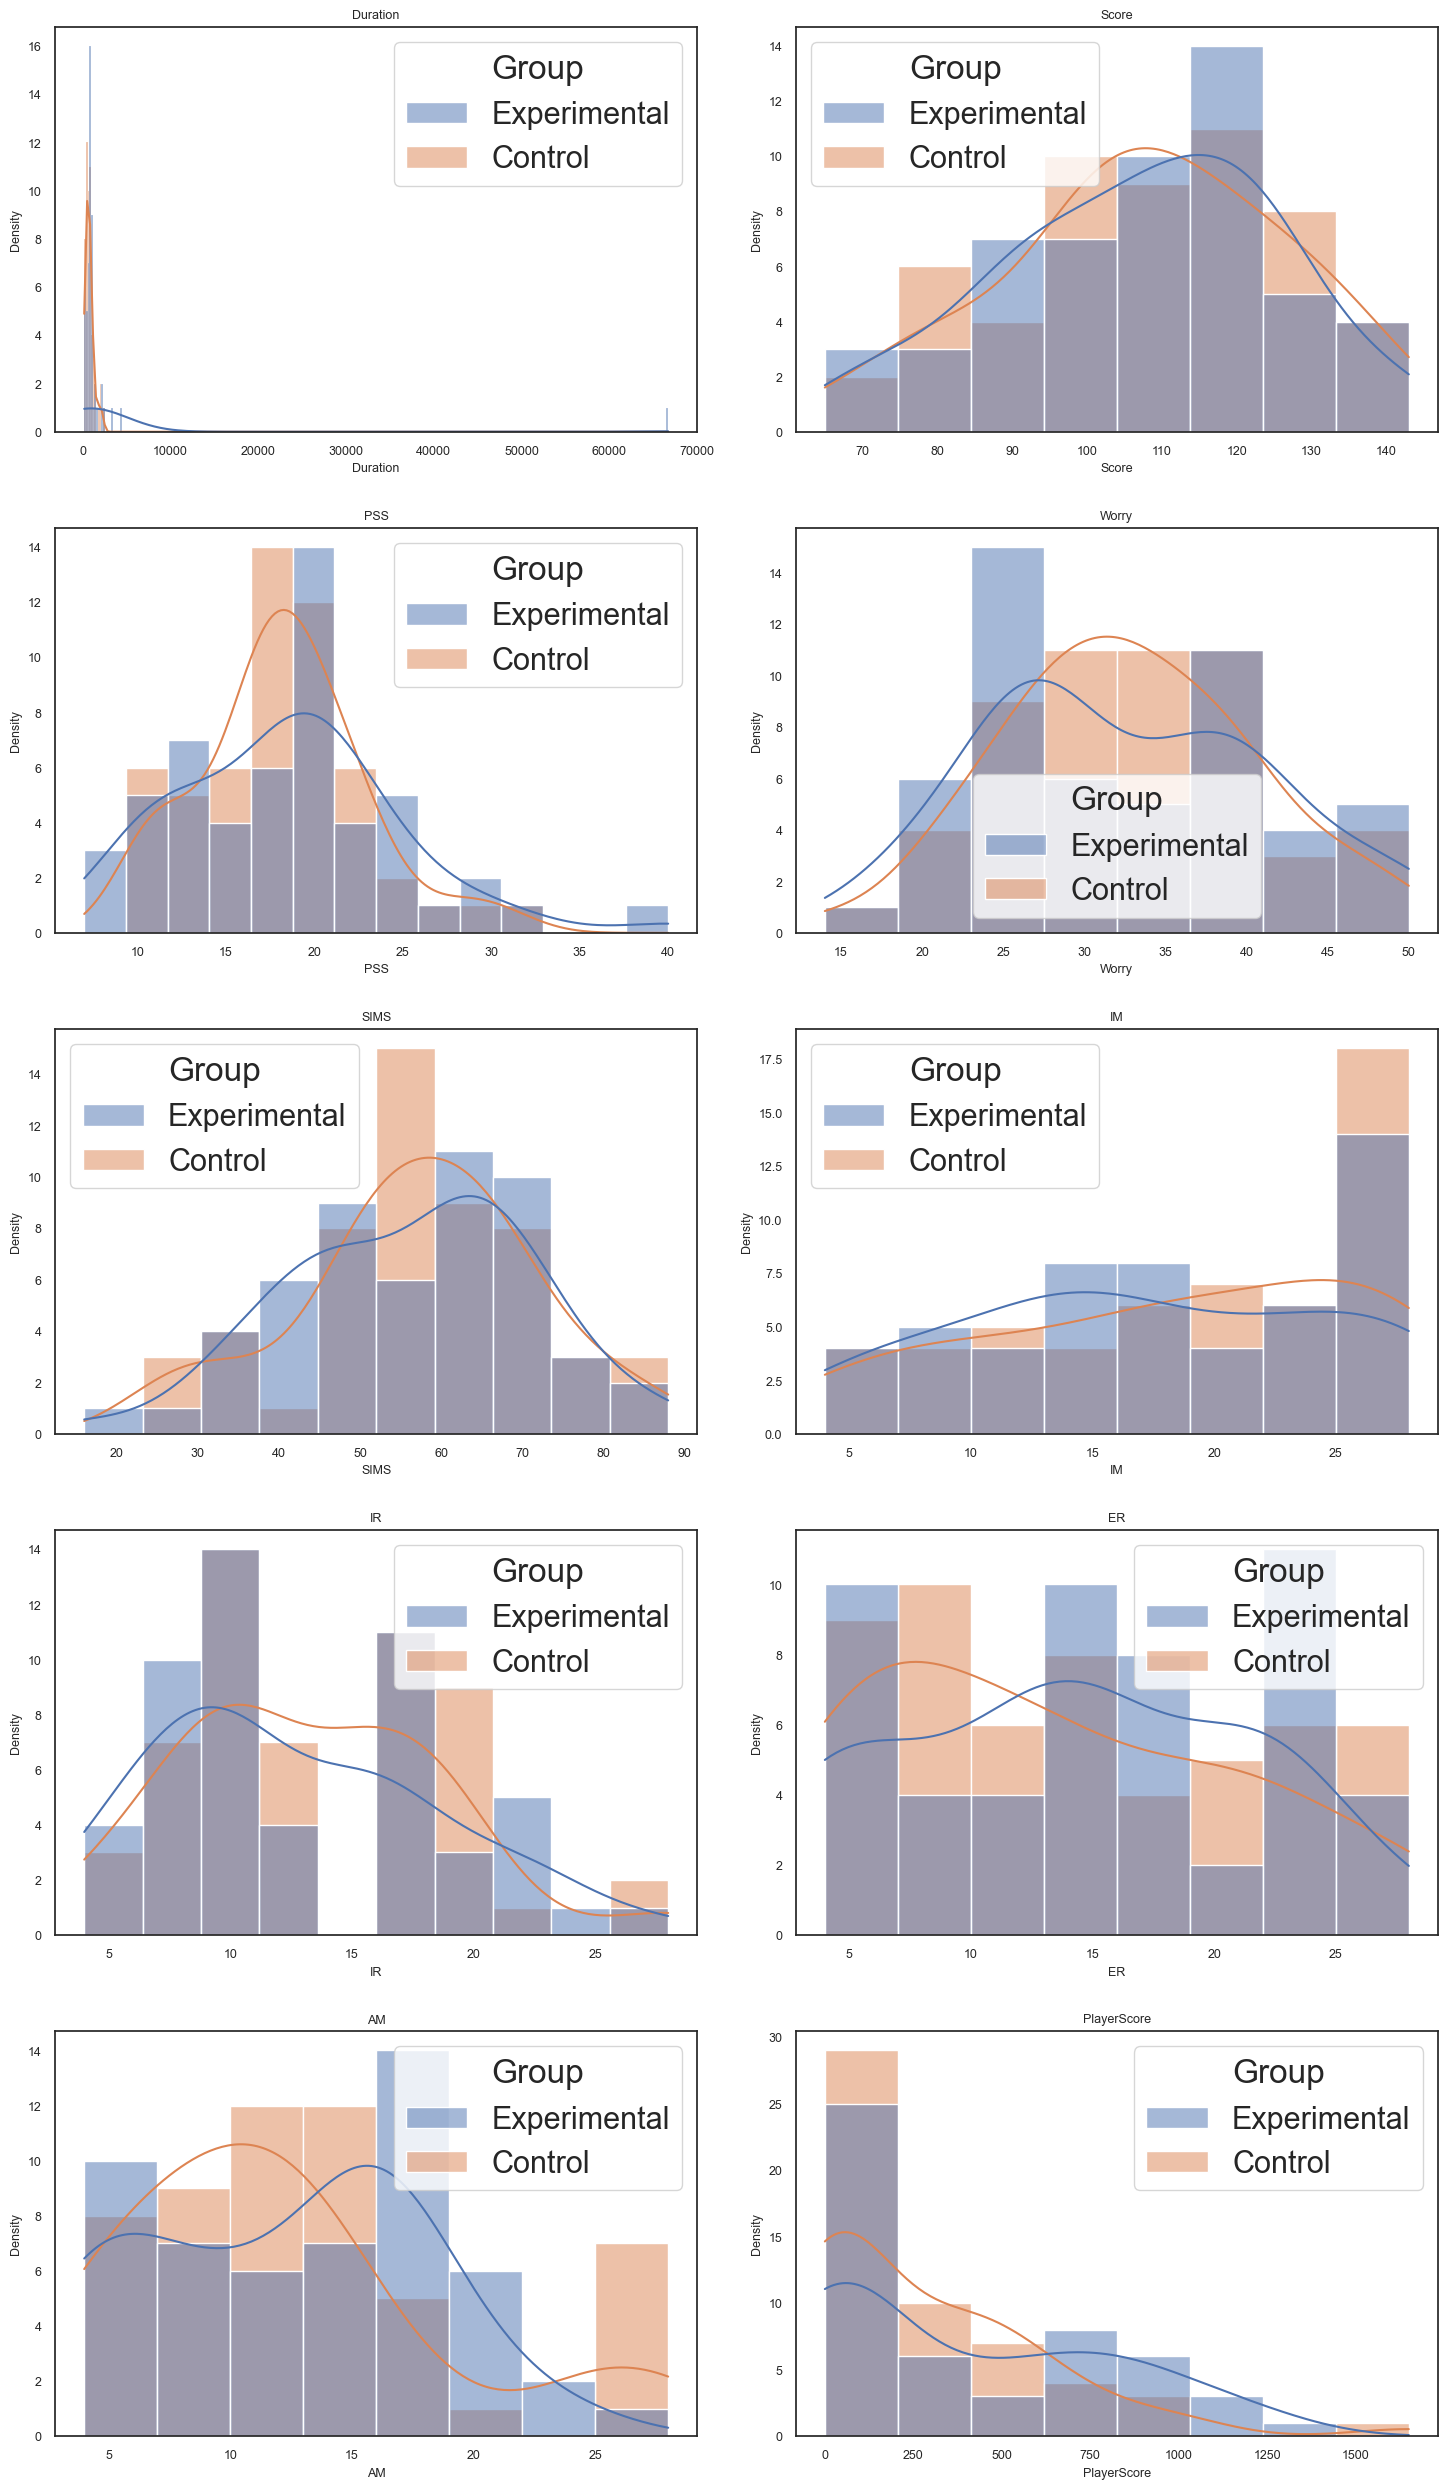

In [22]:
def btwn_groups_plots(data, subplots, fig_size):
    v, h = subplots[:2]
    fig, axes = plt.subplots(v, h, figsize=fig_size)
    label_size = 9
    i = 0

    if v * h == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for col in num_cols:
        sns.histplot(data= data, x= col, ax=axes[i], hue= 'Group', kde= True, common_norm= True)
        
        axes[i].set_title(col, fontsize=label_size)
        axes[i].set_xlabel(col, fontsize=label_size)
        axes[i].set_ylabel('Density', fontsize=label_size)
        axes[i].tick_params(axis="both", labelsize=label_size)
        i += 1
    fig.delaxes(axes[-1])
    fig.delaxes(axes[-2])
    plt.tight_layout()

btwn_groups_plots(data, [len(num_cols)//2+1, 2, 1], [15, 30])

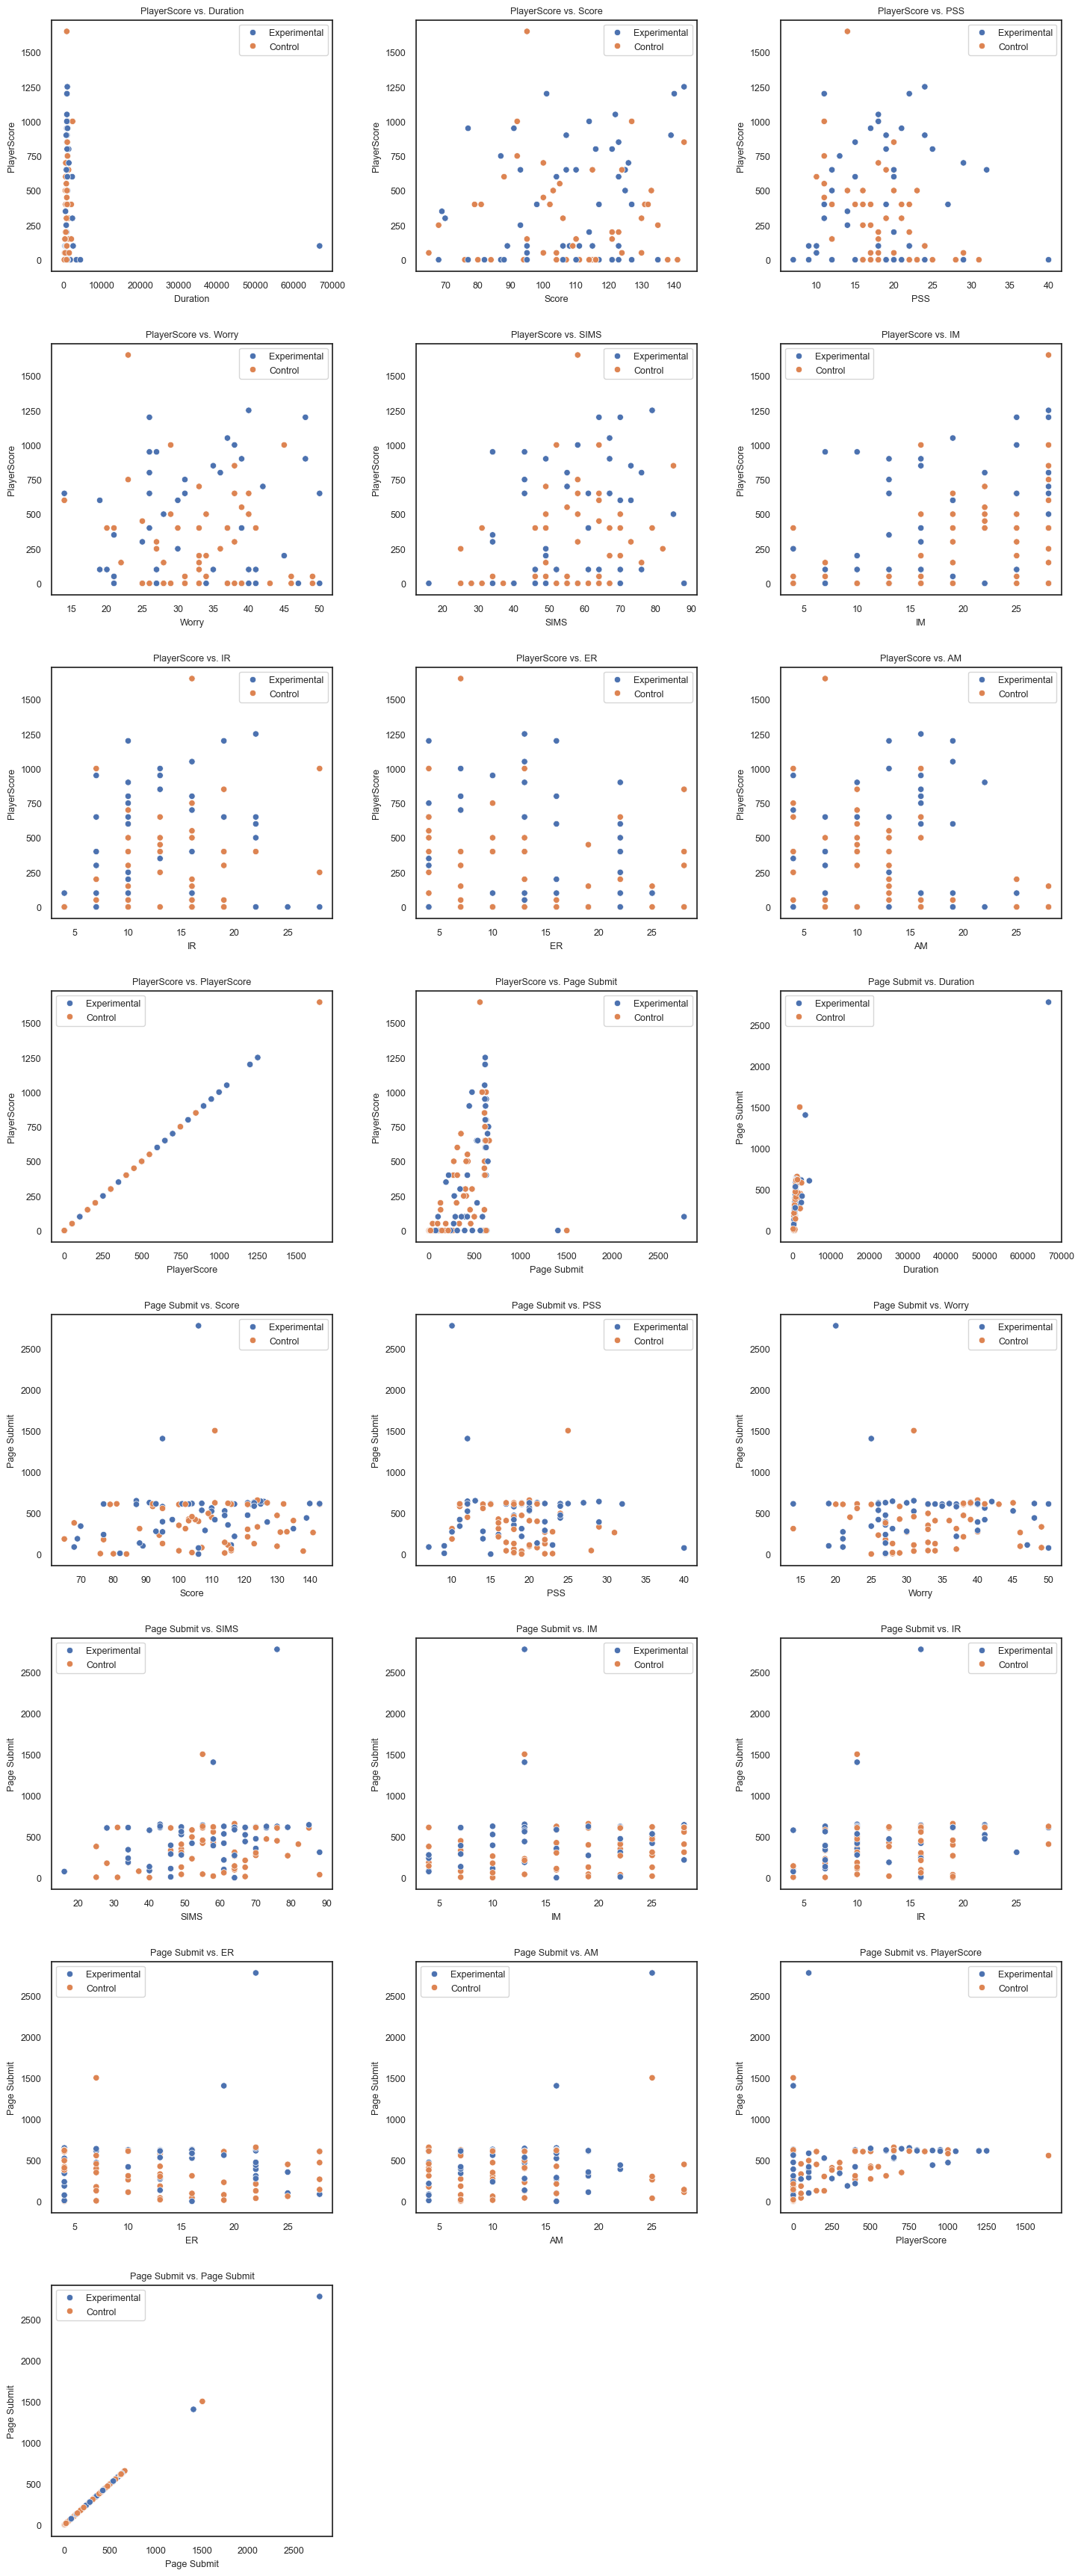

In [12]:
# temp
E_data = data[data['Group'] == 'Experimental']
C_data = data[data['Group'] == 'Control']

def within_groups_plots(data, subplots, fig_size):
    v, h = subplots[:2]
    fig, axes = plt.subplots(v, h, figsize=fig_size)
    label_size = 9
    i = 0

    if v * h == 1:
        axes = [axes]  # Convert single-axis to a list
    else:
        axes = axes.flatten()

    for y_col in ['PlayerScore', 'Page Submit']:
        
        for x_col in num_cols:
            sns.scatterplot(data= data, x= x_col, y= y_col, hue= "Group", ax=axes[i])
            axes[i].set_title(f"{y_col} vs. {x_col}", fontsize=label_size)
            axes[i].set_xlabel(x_col, fontsize=label_size)
            axes[i].set_ylabel(y_col, fontsize=label_size)
            axes[i].tick_params(axis="both", labelsize=label_size)
            axes[i].legend(fontsize= label_size)
            i += 1
    fig.delaxes(axes[-1])
    fig.delaxes(axes[-2])
    plt.tight_layout()

within_groups_plots(data, [8, 3, 1], [15, 35])